In [1]:
import numpy as np
import pandas as pd
pd.__version__
pd.set_option("display.notebook_repr_html", False)

weather = pd.read_csv(
    "~/Projects/gagolewski.com/www/resources/data/nycflights13_weather.csv.gz",
    comment="#")
airports = pd.read_csv(
    "~/Projects/gagolewski.com/www/resources/data/nycflights13_airports.csv.gz",
    comment="#")
airlines = pd.read_csv(
    "~/Projects/gagolewski.com/www/resources/data/nycflights13_airlines.csv.gz",
    comment="#")
planes = pd.read_csv(
    "~/Projects/gagolewski.com/www/resources/data/nycflights13_planes.csv.gz",
    comment="#")
flights = pd.read_csv(
    "~/Projects/gagolewski.com/www/resources/data/nycflights13_flights.csv.gz",
    comment="#")
import sqlite3
conn = sqlite3.connect("/tmp/nycflights13.db") # file path
airports.to_sql("airports", conn)
flights.to_sql("flights", conn)
weather.to_sql("weather", conn)
planes.to_sql("planes", conn)
airlines.to_sql("airlines", conn)

11. `SELECT manufacturer, COUNT(*) FROM planes WHERE seats > 200 GROUP BY manufacturer`

In [7]:
planes.loc[planes.seats > 200].groupby("manufacturer").size().rename("count").reset_index()

       manufacturer  count
0            AIRBUS     66
1  AIRBUS INDUSTRIE      4
2            BOEING    225

12. `SELECT manufacturer, COUNT(*) FROM planes GROUP BY manufacturer HAVING COUNT(*) > 10`

In [11]:
x = planes.groupby("manufacturer").size().rename("count")
x.loc[x>10].reset_index()

                    manufacturer  count
0                         AIRBUS    336
1               AIRBUS INDUSTRIE    400
2                         BOEING   1630
3                 BOMBARDIER INC    368
4                        EMBRAER    299
5              MCDONNELL DOUGLAS    120
6  MCDONNELL DOUGLAS AIRCRAFT CO    103
7  MCDONNELL DOUGLAS CORPORATION     14

13. `SELECT manufacturer, COUNT(*) FROM planes WHERE seats > 200 GROUP BY manufacturer HAVING COUNT(*) > 10`

In [13]:
x = planes.loc[planes.seats > 200].groupby("manufacturer").size().rename("count")
x.loc[x>10].reset_index()

  manufacturer  count
0       AIRBUS     66
1       BOEING    225

14. `SELECT manufacturer, COUNT(*) AS howmany FROM planes GROUP BY manufacturer ORDER BY howmany`

In [16]:
planes.groupby("manufacturer").size().rename("howmany").sort_values().reset_index()

                     manufacturer  howmany
0                      AGUSTA SPA        1
1                         DOUGLAS        1
2                     DEHAVILLAND        1
3              CIRRUS DESIGN CORP        1
4              HURLEY JAMES LARRY        1
5                    CANADAIR LTD        1
6                     JOHN G HESS        1
7                    KILDALL GARY        1
8                        SIKORSKY        1
9                 LAMBERT RICHARD        1
10                LEBLANC GLENN T        1
11                  BARKER JACK L        1
12         AVIONS MARCEL DASSAULT        1
13             AVIAT AIRCRAFT INC        1
14                     MARZ BARRY        1
15                    PAIR MIKE E        1
16         ROBINSON HELICOPTER CO        1
17                    LEARJET INC        1
18                 FRIEDEMANN JON        1
19                   STEWART MACO        2
20                           BELL        2
21                          BEECH        2
22         

15. `SELECT manufacturer, COUNT(*) AS howmany FROM planes GROUP BY manufacturer ORDER BY howmany DESC LIMIT 10`

In [17]:
planes.groupby("manufacturer").size().rename("howmany").sort_values(ascending=False).reset_index().head(10)

                    manufacturer  howmany
0                         BOEING     1630
1               AIRBUS INDUSTRIE      400
2                 BOMBARDIER INC      368
3                         AIRBUS      336
4                        EMBRAER      299
5              MCDONNELL DOUGLAS      120
6  MCDONNELL DOUGLAS AIRCRAFT CO      103
7  MCDONNELL DOUGLAS CORPORATION       14
8                       CANADAIR        9
9                         CESSNA        9

16. `SELECT DISTINCT year, seats FROM planes WHERE year >= 2012 ORDER BY year ASC, seats DESC`

In [21]:
planes.loc[planes.year >= 2012, ["year", "seats"]].drop_duplicates().sort_values(
        by=["year", "seats"], ascending=[True, False])

        year  seats
1637  2012.0    379
1065  2012.0    377
445   2012.0    260
1128  2012.0    222
2539  2012.0    200
609   2012.0    191
2745  2012.0    182
1559  2012.0    149
2630  2012.0    140
815   2012.0     20
1564  2012.0      5
1696  2013.0    379
1083  2013.0    377
1147  2013.0    222
2618  2013.0    200
215   2013.0    199
584   2013.0    191
875   2013.0    182
2787  2013.0    140
578   2013.0     95
843   2013.0     20

17. `SELECT DISTINCT year, seats  FROM planes WHERE year >= 2012 ORDER BY seats DESC, year ASC`

In [27]:
planes.loc[planes.year >= 2012, ["year", "seats"]].drop_duplicates().sort_values(
        by=["seats", "year"], ascending=[False, True])

        year  seats
1637  2012.0    379
1696  2013.0    379
1065  2012.0    377
1083  2013.0    377
445   2012.0    260
1128  2012.0    222
1147  2013.0    222
2539  2012.0    200
2618  2013.0    200
215   2013.0    199
609   2012.0    191
584   2013.0    191
2745  2012.0    182
875   2013.0    182
1559  2012.0    149
2630  2012.0    140
2787  2013.0    140
578   2013.0     95
815   2012.0     20
843   2013.0     20
1564  2012.0      5

In [28]:
A = pd.DataFrame({
 "x": ["a0", "a1",
 "a2", "a3"],
 "y": ["b0", "b1",
 "b2", "b3"]
 })
B = pd.DataFrame({
 "x": ["a0", "a2",
 "a2", "a4"],
 "z": ["c0", "c1",
 "c2", "c3"]
 })


In [29]:
A

    x   y
0  a0  b0
1  a1  b1
2  a2  b2
3  a3  b3

In [30]:
B

    x   z
0  a0  c0
1  a2  c1
2  a2  c2
3  a4  c3

In [31]:
# INNER JOIN
pd.merge(A, B, on="x", how="inner")
# SELECT * FROM A INNER JOIN B ON A.x=B.x

    x   y   z
0  a0  b0  c0
1  a2  b2  c1
2  a2  b2  c2

In [32]:
# LEFT JOIN
# SELECT * FROM A LEFT JOIN B ON A.x=B.x
pd.merge(A, B, on="x", how="left")

    x   y    z
0  a0  b0   c0
1  a1  b1  NaN
2  a2  b2   c1
3  a2  b2   c2
4  a3  b3  NaN

In [33]:
# RIGHT JOIN
# SELECT * FROM A RIGHT JOIN B ON A.x=B.x
pd.merge(A, B, on="x", how="right")

    x    y   z
0  a0   b0  c0
1  a2   b2  c1
2  a2   b2  c2
3  a4  NaN  c3

In [34]:
# OUTER JOIN
# SELECT * FROM A OUTER JOIN B ON A.x=B.x
pd.merge(A, B, on="x", how="outer")

    x    y    z
0  a0   b0   c0
1  a1   b1  NaN
2  a2   b2   c1
3  a2   b2   c2
4  a3   b3  NaN
5  a4  NaN   c3

15. `SELECT * FROM flights LEFT JOIN planes on flights.tailnum=planes.tailnum`

In [35]:
pd.merge(flights, planes, on="tailnum", how="left").head()

   year_x  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0    2013      1    1     517.0             515        2.0     830.0   
1    2013      1    1     533.0             529        4.0     850.0   
2    2013      1    1     542.0             540        2.0     923.0   
3    2013      1    1     544.0             545       -1.0    1004.0   
4    2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier    ...      minute            time_hour  \
0             819       11.0      UA    ...          15  2013-01-01 05:00:00   
1             830       20.0      UA    ...          29  2013-01-01 05:00:00   
2             850       33.0      AA    ...          40  2013-01-01 05:00:00   
3            1022      -18.0      B6    ...          45  2013-01-01 05:00:00   
4             837      -25.0      DL    ...           0  2013-01-01 06:00:00   

   year_y                     type  manufacturer     model  engines  seats  \
0  1999.

16. 
    
    ```
    SELECT planes.*, airlines.* FROM 
       (SELECT DISTINCT carrier, tailnum FROM flights) AS cartail 
    JOIN planes ON cartail.tailnum=planes.tailnum 
    JOIN airlines ON cartail.carrier=airlines.carrier
    ```

In [37]:
cartail = flights.loc[:,["carrier", "tailnum"]].drop_duplicates()
pd.merge(pd.merge(cartail, planes, on="tailnum"), airlines, on="carrier").head()

  carrier tailnum    year                     type manufacturer      model  \
0      UA  N14228  1999.0  Fixed wing multi engine       BOEING    737-824   
1      UA  N24211  1998.0  Fixed wing multi engine       BOEING    737-824   
2      UA  N39463  2012.0  Fixed wing multi engine       BOEING  737-924ER   
3      UA  N29129  1998.0  Fixed wing multi engine       BOEING    757-224   
4      UA  N53441     NaN  Fixed wing multi engine       BOEING  737-924ER   

   engines  seats  speed     engine                   name  
0        2    149    NaN  Turbo-fan  United Air Lines Inc.  
1        2    149    NaN  Turbo-fan  United Air Lines Inc.  
2        2    191    NaN  Turbo-fan  United Air Lines Inc.  
3        2    178    NaN  Turbo-jet  United Air Lines Inc.  
4        2    191    NaN  Turbo-fan  United Air Lines Inc.  

In [52]:
flights2  = flights.loc[flights.origin == "EWR"]
weather2 = weather.loc[
                weather.origin == "EWR",
                ["year", "month", "day", "humid", "temp", "pressure"]
            ].groupby(["year", "month", "day"]).agg(np.mean)
weather2.columns = ["ahumid", "atemp", "apressure"]
weather2 = weather2.reset_index()
pd.merge(flights2, weather2, on=["year", "month", "day"], how="left").head()

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     554.0             558       -4.0     740.0   
2  2013      1    1     555.0             600       -5.0     913.0   
3  2013      1    1     558.0             600       -2.0     923.0   
4  2013      1    1     559.0             600       -1.0     854.0   

   sched_arr_time  arr_delay carrier     ...       origin dest air_time  \
0             819       11.0      UA     ...          EWR  IAH    227.0   
1             728       12.0      UA     ...          EWR  ORD    150.0   
2             854       19.0      B6     ...          EWR  FLL    158.0   
3             937      -14.0      UA     ...          EWR  SFO    361.0   
4             902       -8.0      UA     ...          EWR  LAS    337.0   

  distance  hour  minute            time_hour     ahumid  atemp    apressure  
0     1400     5      15  2013-01-01 05:00:00  58

In [39]:
pd.read_sql_query("""
    SELECT flights2.*, weather2.atemp, weather2.ahumid, weather2.apressure FROM 
       (SELECT * FROM flights WHERE origin='EWR') AS flights2 
    LEFT JOIN 
       (SELECT year, month, day, AVG(temp) AS atemp, 
         AVG(humid) AS ahumid, AVG(pressure) AS apressure 
        FROM weather WHERE origin='EWR' GROUP BY year, month, day) AS weather2 
    ON flights2.year=weather2.year 
      AND flights2.month=weather2.month 
      AND flights2.day=weather2.day
""", conn).head()

   index  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0      0  2013      1    1     517.0             515        2.0     830.0   
1      5  2013      1    1     554.0             558       -4.0     740.0   
2      6  2013      1    1     555.0             600       -5.0     913.0   
3     13  2013      1    1     558.0             600       -2.0     923.0   
4     16  2013      1    1     559.0             600       -1.0     854.0   

   sched_arr_time  arr_delay        ...         origin  dest air_time  \
0             819       11.0        ...            EWR   IAH    227.0   
1             728       12.0        ...            EWR   ORD    150.0   
2             854       19.0        ...            EWR   FLL    158.0   
3             937      -14.0        ...            EWR   SFO    361.0   
4             902       -8.0        ...            EWR   LAS    337.0   

  distance hour  minute            time_hour  weather2.atemp  weather2.ahumid  \
0     1400    5  

In [55]:
import seaborn as sns
flights = sns.load_dataset("flights")
flights.head()

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

In [65]:
# https://www.jstatsoft.org/article/view/v059i10
# https://www.jstatsoft.org/article/view/v040i01

# 1. `cast` (unstack) the `flights` dataset

flights.set_index(["year", "month"]).unstack()
cflights = flights.pivot(index="year", columns="month", values="passengers")
cflights.iloc[:3,:3]

month  January  February  March
year                           
1949       112       118    132
1950       115       126    141
1951       145       150    178

In [68]:
# 2. `melt` (stack) the casted flights dataset
cflights.stack().rename("passengers").reset_index()

     year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
5    1949       June         135
6    1949       July         148
7    1949     August         148
8    1949  September         136
9    1949    October         119
10   1949   November         104
11   1949   December         118
12   1950    January         115
13   1950   February         126
14   1950      March         141
15   1950      April         135
16   1950        May         125
17   1950       June         149
18   1950       July         170
19   1950     August         170
20   1950  September         158
21   1950    October         133
22   1950   November         114
23   1950   December         140
24   1951    January         145
25   1951   February         150
26   1951      March         178
27   1951      April         163
28   1951        May         172
29   1951 

In [70]:
h = pd.read_html("https://en.wikipedia.org/wiki/Berlin")
type(h)

list

In [71]:
len(h)

57

In [74]:
h[2]

                                                   0             1   \
0   Climate data for Berlin- Tempelhof (1971–2000)...           NaN   
1                                               Month           Jan   
2                                 Record high °C (°F)   15.5 (59.9)   
3                                Average high °C (°F)    3.3 (37.9)   
4                                  Daily mean °C (°F)    0.6 (33.1)   
5                                 Average low °C (°F)   −1.9 (28.6)   
6                                  Record low °C (°F)  −23.1 (−9.6)   
7                        Average rainfall mm (inches)  42.3 (1.665)   
8                       Average rainy days (≥ 1.0 mm)          10.0   
9                         Mean monthly sunshine hours          46.5   
10  Source: World Meteorological Organization (UN)...           NaN   

               2             3             4             5             6   \
0             NaN           NaN           NaN           NaN           

In [75]:
import requests
import lxml.html, cssselect, html5lib

In [77]:
r = requests.get("https://en.wikipedia.org/wiki/Berlin")
src = r.text
doc = lxml.html.fromstring(src)
doc

<Element html at 0x7f08122d09f8>

In [78]:
doc.getchildren()

[<Element head at 0x7f08122d0778>, <Element body at 0x7f08122a92c8>]

In [79]:
doc.cssselect("div.toc")

[<Element div at 0x7f08122a9408>]

In [80]:
e = doc.cssselect("div.toc")[0]
e

<Element div at 0x7f08122a9408>

In [83]:
print(e.text_content())



Contents


1 History

1.1 Etymology
1.2 12th to 16th centuries
1.3 17th to 19th centuries
1.4 20th to 21st centuries


2 Geography

2.1 Topography
2.2 Climate
2.3 Cityscape
2.4 Architecture


3 Demographics

3.1 International communities
3.2 Languages
3.3 Religion


4 Government

4.1 City state
4.2 Boroughs
4.3 Twin towns – sister cities
4.4 Capital city


5 Economy

5.1 Companies
5.2 Tourism and conventions
5.3 Creative industries
5.4 Media


6 Infrastructure

6.1 Transport
6.2 Energy
6.3 Health
6.4 Telecommunication


7 Education

7.1 Higher education
7.2 Research


8 Culture

8.1 Galleries and museums
8.2 Nightlife and festivals
8.3 Performing arts
8.4 Cuisine
8.5 Recreation
8.6 Sports


9 See also
10 Notes
11 References
12 External links




In [87]:
[ f.text_content() for f in e.cssselect("li  li")]
# CSS Selectors (!)

['1.1 Etymology',
 '1.2 12th to 16th centuries',
 '1.3 17th to 19th centuries',
 '1.4 20th to 21st centuries',
 '2.1 Topography',
 '2.2 Climate',
 '2.3 Cityscape',
 '2.4 Architecture',
 '3.1 International communities',
 '3.2 Languages',
 '3.3 Religion',
 '4.1 City state',
 '4.2 Boroughs',
 '4.3 Twin towns – sister cities',
 '4.4 Capital city',
 '5.1 Companies',
 '5.2 Tourism and conventions',
 '5.3 Creative industries',
 '5.4 Media',
 '6.1 Transport',
 '6.2 Energy',
 '6.3 Health',
 '6.4 Telecommunication',
 '7.1 Higher education',
 '7.2 Research',
 '8.1 Galleries and museums',
 '8.2 Nightlife and festivals',
 '8.3 Performing arts',
 '8.4 Cuisine',
 '8.5 Recreation',
 '8.6 Sports']

In [88]:
# <a href="link.....">label</a>
[ (a.text_content(), a.attrib.get("href"))
 for a in doc.cssselect("a")]

[('', None),
 ('navigation', '#mw-head'),
 ('search', '#p-search'),
 ('Berlin (disambiguation)', '/wiki/Berlin_(disambiguation)'),
 ('State of Germany', '/wiki/States_of_Germany'),
 ('', '/wiki/File:Siegessaeule_Aussicht_10-13_img4_Tiergarten.jpg'),
 ('', '/wiki/File:Brandenburger_Tor_abends.jpg'),
 ('', '/wiki/File:Journalists_during_the_Berlin_Film_Festival_in_2008.jpg'),
 ('', '/wiki/File:East_Side_Gallery.JPG'),
 ('', '/wiki/File:Alte_Nationalgalerie_Berlin,_2011.jpg'),
 ('', '/wiki/File:Reichstag_building_Berlin_view_from_west_before_sunset.jpg'),
 ('TV Tower', '/wiki/Fernsehturm_Berlin'),
 ('Brandenburg Gate', '/wiki/Brandenburg_Gate'),
 ('Berlin International Film Festival',
  '/wiki/Berlin_International_Film_Festival'),
 ('East Side Gallery', '/wiki/East_Side_Gallery'),
 ('Berlin Wall', '/wiki/Berlin_Wall'),
 ('Alte Nationalgalerie', '/wiki/Alte_Nationalgalerie'),
 ('Reichstag building', '/wiki/Reichstag_building'),
 ('', '/wiki/File:Flag_of_Berlin.svg'),
 ('Flag', '/wiki/Flag_

In [89]:
# lxml
# https://scrapy.org/
# http://selenium-python.readthedocs.io/

# String operations

In [93]:
x = pd.Series(["ni", "a knight", None, "123"])
x

0          ni
1    a knight
2        None
3         123
dtype: object

In [94]:
# http://pandas.pydata.org/pandas-docs/stable/text.html
# "Working with Text data"
x.str

In [95]:
x.str.isalpha() #isdigit, ....

0     True
1    False
2     None
3    False
dtype: object

In [96]:
x.str.upper() # lower...

0          NI
1    A KNIGHT
2        None
3         123
dtype: object

In [97]:
"Ulf" == "ULF"

False

In [98]:
x.str.len()

0    2.0
1    8.0
2    NaN
3    3.0
dtype: float64

In [99]:
x.str.repeat(2)

0                nini
1    a knighta knight
2                None
3              123123
dtype: object

In [100]:
x.str.cat(sep=", ")

'ni, a knight, 123'

In [101]:
x + x

0                nini
1    a knighta knight
2                 NaN
3              123123
dtype: object

In [102]:
x.str.slice(0, 2) # substrings

0      ni
1      a 
2    None
3      12
dtype: object

In [103]:
x.str.slice_replace(-1, repl="XYZ")

0          nXYZ
1    a knighXYZ
2          None
3         12XYZ
dtype: object

# Regular Expressions

split, findall, count, contains, extract, extractall, replace

http://www.regular-expressions.info/

In [105]:
berlin = pd.read_html("https://en.wikipedia.org/wiki/Berlin")[2]

In [110]:
import re

# a regular expression - a patter
# . [ ] ( ) { } ?  * +
pd.Series(["Ni!", "Ni, ni!", "Ni-whom"]).str.findall("Ni")

0    [Ni]
1    [Ni]
2    [Ni]
dtype: object

In [111]:
pd.Series(["Ni!", "Ni, ni!", "Ni-whom"]).str.findall("Ni", 
                                                     re.IGNORECASE)

0        [Ni]
1    [Ni, ni]
2        [Ni]
dtype: object

In [112]:
# [ai] = {a, i}
pd.Series(["na na nu ni ne na ni"]).str.findall("n[ai]")

0    [na, na, ni, na, ni]
dtype: object

In [116]:
# \d = ASCII digits
# \D = negation of \d = [^\d]
# \w = word characters (mostly letters and digits)
# \s = whitespaces
# \W, \S
# [a-z]
pd.Series(["na na nu ni ne na ni"]).str.findall("\\w\\w")

0    [na, na, nu, ni, ne, na, ni]
dtype: object

In [117]:
pd.Series(["na na nu ni ne na ni"]).str.findall(r"\w\w")

0    [na, na, nu, ni, ne, na, ni]
dtype: object

In [118]:
# . - matches anything except \n
pd.Series(["na na nu ni ne na ni"]).str.findall(r"..")

0    [na,  n, a , nu,  n, i , ne,  n, a , ni]
dtype: object

In [121]:
# the alternative, |
x = pd.Series(["na na nu ni ne na ni", "na na na"]).str.findall(
    r"na na|nu")
x

0    [na na, nu]
1        [na na]
dtype: object

In [122]:
x[0]

['na na', 'nu']

In [123]:
x.str.len()

0    2
1    1
dtype: int64

In [124]:
x.str.slice(0, 1)

0    [na na]
1    [na na]
dtype: object

In [125]:
x.str.get(0)

0    na na
1    na na
dtype: object

In [126]:
x.str.upper()

0   NaN
1   NaN
dtype: float64

In [127]:
# quantifiers:
# * - repeat 0 or more times
# + - repeat 1 or more times
# ? - either 0 or 1
# {n,m} - repeat from n to m times
pd.Series("ni! ninini! nnnniiiiii! n n nu! ni!").str.findall(r"ni+")

0    [ni, ni, ni, ni, niiiiii, ni]
dtype: object

In [134]:
# (?:....a group....)  "non-capturing group"
pd.Series("ni! ninini! nnnniiiiii! n n nu! ni!"
         ).str.findall(r"(?:ni)+")

0    [ni, ninini, ni, ni]
dtype: object

In [140]:
pd.Series("zzzzz(aaa)(bbb)(ccccc)ddddddd(fff)uuu"
         ).str.findall(r"\(.*\)")

0    [(aaa)(bbb)(ccccc)ddddddd(fff)]
dtype: object

In [141]:
# *  - 0 or more, greedily
# *? - 0 or more, non-greedily
#
# ? or ??
pd.Series("zzzzz(aaa)(bbb)(ccccc)ddddddd(fff)uuu"
         ).str.findall(r"\(.*?\)")

0    [(aaa), (bbb), (ccccc), (fff)]
dtype: object

In [ ]:
# regularexpressionsarenoworsetoreadormaintainthananyotherunformattedcontent

In [144]:
print("a\nb")

a
b


In [145]:
print("a\\nb")

a\nb


In [146]:
print(r"a\nb")

a\nb


In [148]:
pd.Series("ni! ninini! nnnniiiiii! n n nu! niniiniiii!").str.findall(r"(?:ni+)+")

0    [ni, ninini, niiiiii, niniiniiii]
dtype: object

In [156]:
# [^abc] = everything but [abc]
#
# ^ - match at the start of the string
# $ - match the end
# \b - matches at a word boundary, i.e., where \W preceeds \w or \w - \W

# \.csv$
# ^[a-zA-Z0-9]+$  
pd.Series(["afsfds78", "fdsgfsd t5435 gfdgfd"]).str.contains("^[a-zA-Z0-9]+$")

0     True
1    False
dtype: bool

In [153]:
# ^[a-zA-Z0-9]+$   - match any sequence of consecutive letdigs in the whole
#  [a-zA-Z0-9]+$   - match any sequence of consecutive letdigs at the end of a string
# ^[a-zA-Z0-9]+    - match any sequence of consecutive letdigs at the beg of a string
#  [a-zA-Z0-9]+    - match any sequence of consecutive letdigs in a string

In [155]:
pd.Series(["afsfds78", "fdsgfsd t5435 gfdgfd"]).str.findall("[a-zA-Z0-9]+")

0                  [afsfds78]
1    [fdsgfsd, t5435, gfdgfd]
dtype: object

|      | Jan | Feb | ... | Dec |
|------|-----|-----|-----| ----|
| Record high | 15.5 | 18.7| ... | ... |
| Record low | -23.1 | -26.0| ... | ... |

In [157]:
berlin

                                                   0             1   \
0   Climate data for Berlin- Tempelhof (1971–2000)...           NaN   
1                                               Month           Jan   
2                                 Record high °C (°F)   15.5 (59.9)   
3                                Average high °C (°F)    3.3 (37.9)   
4                                  Daily mean °C (°F)    0.6 (33.1)   
5                                 Average low °C (°F)   −1.9 (28.6)   
6                                  Record low °C (°F)  −23.1 (−9.6)   
7                        Average rainfall mm (inches)  42.3 (1.665)   
8                       Average rainy days (≥ 1.0 mm)          10.0   
9                         Mean monthly sunshine hours          46.5   
10  Source: World Meteorological Organization (UN)...           NaN   

               2             3             4             5             6   \
0             NaN           NaN           NaN           NaN           

Month Record high °C (°F) Record low °C (°F)
Jan           15.5 (59.9)       −23.1 (−9.6)
Feb           18.7 (65.7)      −26.0 (−14.8)
Mar           24.8 (76.6)        −16.5 (2.3)
Apr           31.3 (88.3)        −8.1 (17.4)
May           35.5 (95.9)        −4.0 (24.8)
Jun           35.9 (96.6)         1.5 (34.7)
Jul          38.1 (100.6)         5.4 (41.7)
Aug          38.0 (100.4)         3.5 (38.3)
Sep           34.2 (93.6)        −1.5 (29.3)
Oct           28.1 (82.6)        −9.6 (14.7)
Nov           20.5 (68.9)        −16.0 (3.2)
Dec           16.0 (60.8)       −20.5 (−4.9)
Year         38.1 (100.6)      −26.0 (−14.8)

In [171]:
x = berlin.iloc[ [2, 6] ]
x.columns = berlin.iloc[1]
x = x.set_index("Month")
x = x.T
x.index.name = None
for i in range(2):
    x.iloc[:,i] = x.iloc[:,i].str.replace("−", "-")
    x.iloc[:,i] = x.iloc[:,i].str.findall(r"-?\d+\.\d+").str.get(0).astype("float")
x

Month  Record high °C (°F)  Record low °C (°F)
Jan                   15.5               -23.1
Feb                   18.7               -26.0
Mar                   24.8               -16.5
Apr                   31.3                -8.1
May                   35.5                -4.0
Jun                   35.9                 1.5
Jul                   38.1                 5.4
Aug                   38.0                 3.5
Sep                   34.2                -1.5
Oct                   28.1                -9.6
Nov                   20.5               -16.0
Dec                   16.0               -20.5
Year                  38.1               -26.0

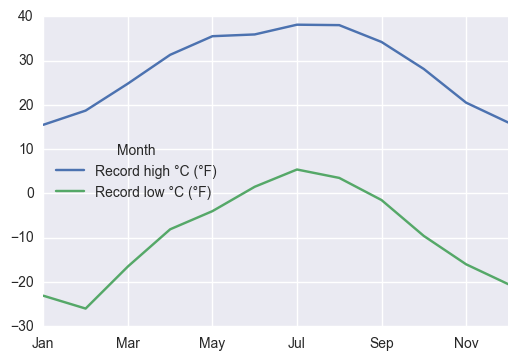

In [177]:
%matplotlib inline
x.iloc[:-1].plot()

# Exercises
THe referenced datasets are available at www.gagolewski.com/resources



1. Consider the `nasaweather_glaciers` data frame.
All glaciers are assigned 11/12-character unique identifiers.
The ID number is assigned to the glacier as defined by the WGMS
convention that forms the glacier ID number by combining the 
following five elements. Extract all of them and store them as independent
columns in the data frame.

    * 2-character political unit
    * 1-digit continent code
    * 4-character drainage code
    * 2-digit free position code
    * 2-3-digit local glacier code

2. Consider the `nycflights13_weather` data frame.
Create the `time_hour` column (ignore the existing one) of type date-time
based on `year`, `month`, `day`, and `hour`. Note that
Eastern Standard Time (EST) is 5 hours behind UTC
and that Eastern Daylight Time (EDT) is used in the summer.

3. Take the above data frame. Convert the `time_hour`
column to plain text. Use the ISO 8601 `date-T-time-timezoneshift` format
like `2017-01-17T13:29:24+00:00`.

5. Web-scape the HTML tables
`index_src_base_R-0.html.txt`, `index_src_base_R-1.html.txt`,
`index_src_base_R-2.html.txt`, `index_src_base_R-3.html.txt`.
Merge them to a single data frame. Convert the *Last modified* column
to a date-time object. Covert the *Size* column to numeric.

6. Extract all e-mail addresses from http://dirk.eddelbuettel.com/cranberries/2016/10/01/

7. Generate a list of cities based on https://en.wikipedia.org/wiki/List_of_cities_by_latitude; web-crawl on each city's page, extract a nice pandas data-frame representing climate data; for each city, generate a separate .csv file (this should give you ca. 800-900 csv files)

# Cython
www.cython.org

In [180]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [182]:
def pi1(n):
    s = 1.0 # == pi1(0)
    a = 1.0
    b = 1.0
    for i in range(1, n+1):
        a = -a
        b += 2.0
        s += a/b
    return 4.0*s

pi1(10000000)

3.1415927535897814

In [184]:
import numpy as np
def pi2(n):
    s = 1.0/(np.arange(0, n+1)*2.0+1.0)
    s[1::2] = -s[1::2]
    return 4.0*np.sum(s)

pi2(10000000)

3.1415927535897881

In [185]:
%timeit pi1(1000000)
%timeit pi2(1000000)

10 loops, best of 3: 102 ms per loop
100 loops, best of 3: 9 ms per loop


In [189]:
%%cython -a
def pi3(n):
    s = 1.0
    a = 1.0
    b = 1.0
    for i in range(1, n+1):
        a = -a
        b += 2.0
        s += a/b
    return 4.0*s

In [187]:
pi3(10000000)

3.1415927535897814

In [188]:
%timeit pi1(1000000)
%timeit pi2(1000000)
%timeit pi3(1000000)

10 loops, best of 3: 99.7 ms per loop
100 loops, best of 3: 8.8 ms per loop
100 loops, best of 3: 17.3 ms per loop


In [190]:
%%cython -a
cpdef double pi4(int n):
    cdef double s = 1.0
    cdef double a = 1.0
    cdef double b = 1.0
    cdef int i
    for i in range(1, n+1):
        a = -a
        b += 2.0
        s += a/b
    return 4.0*s

In [191]:
%timeit pi1(1000000)
%timeit pi2(1000000)
%timeit pi3(1000000)
%timeit pi4(1000000)

10 loops, best of 3: 92.4 ms per loop
100 loops, best of 3: 8.79 ms per loop
100 loops, best of 3: 17.2 ms per loop
100 loops, best of 3: 4.16 ms per loop


In [193]:
np.random.seed(123)
x = np.random.rand(10000)

def quadratic_mean1(x):
    return np.sqrt(np.mean(x**2))

In [200]:
%%cython
import numpy as np
cimport numpy as np
cimport cython

@cython.boundscheck(False)
@cython.wraparound(False)
@cython.nonecheck(False)
cpdef double quadratic_mean2(np.ndarray[np.double_t] x):
    # ...len(x)
    # ...x[i]
    cdef double s = 0.0
    cdef unsigned int i, n = len(x)
    for i in range(n):
        s += x[i]*x[i]
    return (s/n)**0.5
    

In [199]:
%timeit quadratic_mean1(x)
%timeit quadratic_mean2(x)

The slowest run took 14.56 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 18.4 µs per loop
100000 loops, best of 3: 9.84 µs per loop


In [ ]:
# np.ndarray[np.double_t, ndim=2] A
# A.shape[0]
# A.shape[1]
# A[i,j]

# Exercises



1. Write a function that determines whether a given numeric list
is a palindrome.

2. Write a function that reverses the order of elements in a given numeric list.


28. Write a function that determines if all elements in a given logical
list are equal to `True`.

29. Write a function that determines if any element in a given logical
list is equal to `True`.

30. Write a function that counts the number of elements equal to `True`
in a given logical list.

24. Write a function that computes the cumulative sums of consecutive elements
in a given numeric `x`, i.e., a vector `r` with $r_i = \sum_{j=1}^i x_j$.

25. Write a funciton to compute the iterated (adjacent)
difference between consecutive elements
in a given numeric list `x`, i.e., a vector `r` with $r_i = x_{i+1}-x_i$.

23. Write a function that adds the corresponding items
in two numeric lists (elementwise), i.e., for given `x`, `y` return
`r` such that $r_i=x_i+y_i$. If vectors are of unequal lenghts,
the shorter one should be recycled, e.g.,
`[1,2,3,4,5,6]+[7,8]==[1,2,3,4,5,6]+[7,8,7,8,7,8]`.

26. Write a function that determines if a given list is sorted non-decreasingly.


2. Write a function which checks if a given natural number
is prime.

3. Write a function that counts the number of primes in the set 
$\{a,a+1,\dots,b\}$, for given $a<b$. Calling the function from the above
exercise does not lead to a time-optimal solution.
Hint: implement the Eratosthenes sieve.

4. Write a function that determines the least and the greatest element
in a given numeric list. Only one `for` loop is allowed.

4. Write a function that determines the indexes (positions)
of the least and the greatest element in a given numeric list.

5. Write a function which finds the 3rd least element in a given numeric
list, e.g., given `[3.0,5.0,2.0,4.0,1.0,6.0]`, the result should be equal to `4.0`.
Only a single `for` loop is allowed.

6. Write a function which finds the $k$ (given) least elements in some
on-line data stream (it can be based on a list, but you are allowed
to inspect each its element only once). 


7. Let `t` be an integer list with elements from 0 to $k-1$ for some $k$
(if your language - e.g., R - supports $1$-based indexing, assume that the elements
are from 1 to $k$).
Write a function that determines the mode, i.e, the most frequently occurring
value in `t`. If a mode is not-unique, return a random one.
Hint: use an auxiliary list of length $k$ to count the number of occurrences
of each element.

8. Let `t` and $k$ be as above. Implement the bucket sort algorithm.
Hint: the same as above.


14. Let `x` - numeric vector, `t` - an integer list with elements from 0 to $k-1$ for some $k$.
Return a vector of length $k$ which gives arithmetic means of observations in `x` grouped by 
corresponding values in `t` (something like SELECT t, MEAN(x) GROUP BY t).

15. The same, but compute the group medians.


9. Write a function to determine the mode in a sequence of arbitrary
(assume that they are immutable/hashable) objects. Hint: use a dictionary.


27. Write a function that determines if all elements in a given list are unique.
Use a dictionary.



10. Let $w(x)=w_0+w_1 x+\dots+w_n x^n$ and $v(x)=v_0+v_1 x+v_m x^m$ be two polynomials
of degrees $n$ and $m$, respectively.
Write a function takes takes two lists of coefficients, one of length $n+1$ and the
other of length $m+1$, representing two polynomials $w$ and $v$. 
Return a list of coefficients that represent the
polynomial $u(x)=w(x)v(x)$.



12. Implement the selection sort algorithm.

13. Implement the insertion sort algorithm.


14. Let `x` be a non-decreasingly sorted integer list.
Write a function that verifies whether a given `v` is in `x`.
Implement an algorithm that has a logarithmic time complexity.



15. Write a function that determines if all elements in a given sorted
list are unique.

11. Let `x` and `y` be two non-decreasingly sorted integer lists.
Write a function that returns their non-decreasingly sorted concatenation,
e.g., if `x=[1,4,5]` and `y=[0,2,3,6]`, then the expected output is `[0,1,2,3,4,5,6]`.
Implement an algorithm that has linear time complexity.

12. Let `x` and `y` be two (strictly) increasingly sorted integer lists,
representing two subsets of $\mathbb{Z}$.
Write a function that determines their union.

13. As above, but now implement the set intersection.

15. Implement the merge sort algorithm.

16. Write a function that rearranges the elements in a numeric list in such a way
that the elements less than or equal to a given `v` are followed by the elements
greater than `v`.

17. Implement the quick sort algorithm (with random pivoting).

18. Implement a hybrid quick sort algorithm:
in a recursive function call, if a subsequence of length ≤ 20 is to be ordered, 
then the insertion sort algorithm is used instead of the plain quick sort scheme.
Note: hybrid quick sort tends to be faster than its plain version.

19. Write a function that randomly rearranges the elements in a given
numeric list (generates its random permutation).
Implement the Knuth-Fisher-Yates shuffle. 

20. Implement the quick-select algorithm for finding the $k$-th smallest
value in an unsorted list (for a given $k$).

21. Implement a partial quick sort  algorithm that guarantes
that the $k$ smallest values are in order  (for a given $k$).

22. Implement an algorithm that determines the permutation of elements
that generates a non-decreasingly ordered version of a given list `x`
(compare `argsort()` in NumPy or `order()` in R),
i.e., an integer list $[i_1,i_2,\dots,i_n]$ such that $x_{i_1}\le x_{i_2}\le\dots\le x_{i_n}$.
The routine should be based on a stable sorting algorithm,
i.e., if $x_{i_u}=x_{i_v}$ for some $u<v$, then necessarily $i_u<i_v$
(the relative ordering of elements with the same key should be preserved).

23. Given two integer lists of arbitrary lenghts, determine if the
first one is lexicographically less-than-or-equal-to the second one.

24. Write a function that ranks each element in a given numeric vector.
For example, given (1, 3, 5, 2, 4, 3), we should get
(1.0, 3.5, 6.0, 2.0, 5.0, 3.5).

25. Four men want to cross a bridge. But at most 2 people may cross it at a time.
For man A it takes 10 minutes to cross, for B -- 5 minutes,
C -- 2 minutes, and D  -- 1 minute. If two people cross the bridge together,
they must walk at the pace of the slower one.
Also, it is night. Each trip requires a flashlight.  There
is only one flashlight. The men are not allowed to toss the light over
the river. How fast can you get all 4 men over the bridge?
Examine all the 108 possible solutions and determine the optimal one
(the optimal time is $<19$).